<a href="https://colab.research.google.com/github/AbhinavBh18/House-Price-Predictor/blob/main/House_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('housing.csv')

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
train_data=int(0.8*len(data))

In [ ]:
X=data.drop(["median_house_value"], axis=1)
y=data["median_house_value"]

In [ ]:
x_train, y_train, x_test, y_test = X[:train_data], y[:train_data], X[train_data:], y[train_data:]
len(x_train), len(y_train), len(x_test), len(y_test)

(16346, 16346, 4087, 4087)

In [ ]:
train_data=x_train.join(y_train)

In [ ]:
train_data.corr()

<ipython-input-11-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.934179,-0.177747,0.057589,0.073938,0.110828,0.062574,0.041724,0.014098
latitude,-0.934179,1.000000,0.054678,-0.037023,-0.064497,-0.113142,-0.072489,-0.107704,-0.173676
housing_median_age,-0.177747,0.054678,1.000000,-0.368660,-0.329979,-0.301771,-0.309495,-0.123194,0.119038
total_rooms,0.057589,-0.037023,-0.368660,1.000000,0.929659,0.855128,0.916909,0.206959,0.134287
total_bedrooms,0.073938,-0.064497,-0.329979,0.929659,1.000000,0.877030,0.978933,-0.000107,0.057550
population,0.110828,-0.113142,-0.301771,0.855128,0.877030,1.000000,0.907608,0.003876,-0.026857
households,0.062574,-0.072489,-0.309495,0.916909,0.978933,0.907608,1.000000,0.019760,0.072154
median_income,0.041724,-0.107704,-0.123194,0.206959,-0.000107,0.003876,0.019760,1.000000,0.672918
median_house_value,0.014098,-0.173676,0.119038,0.134287,0.057550,-0.026857,0.072154,0.672918,1.000000


<ipython-input-12-9ab4983852c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

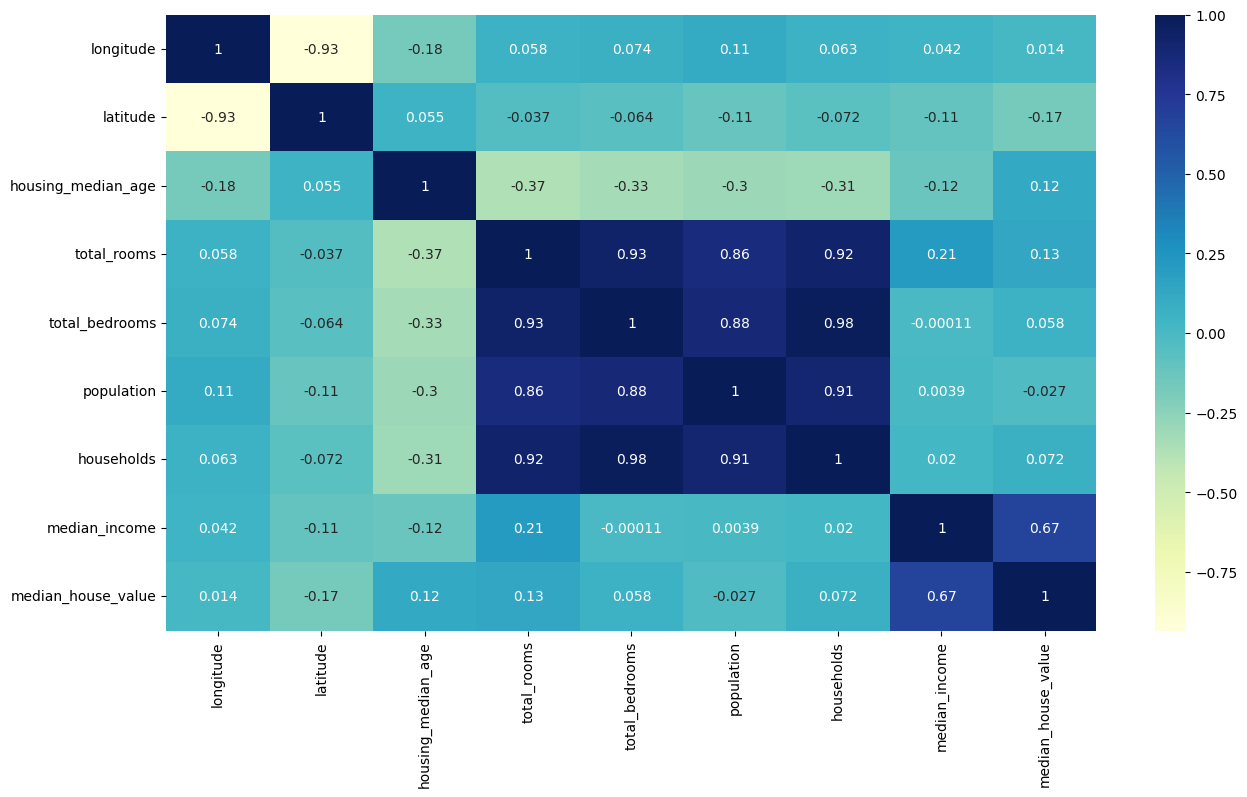

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
train_data['total_rooms']=np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms'] + 1)
train_data['population']=np.log(train_data['population'] + 1)
train_data['households']=np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'bedroom_ratio'}>, <Axes: >, <Axes: >]],
      dtype=object)

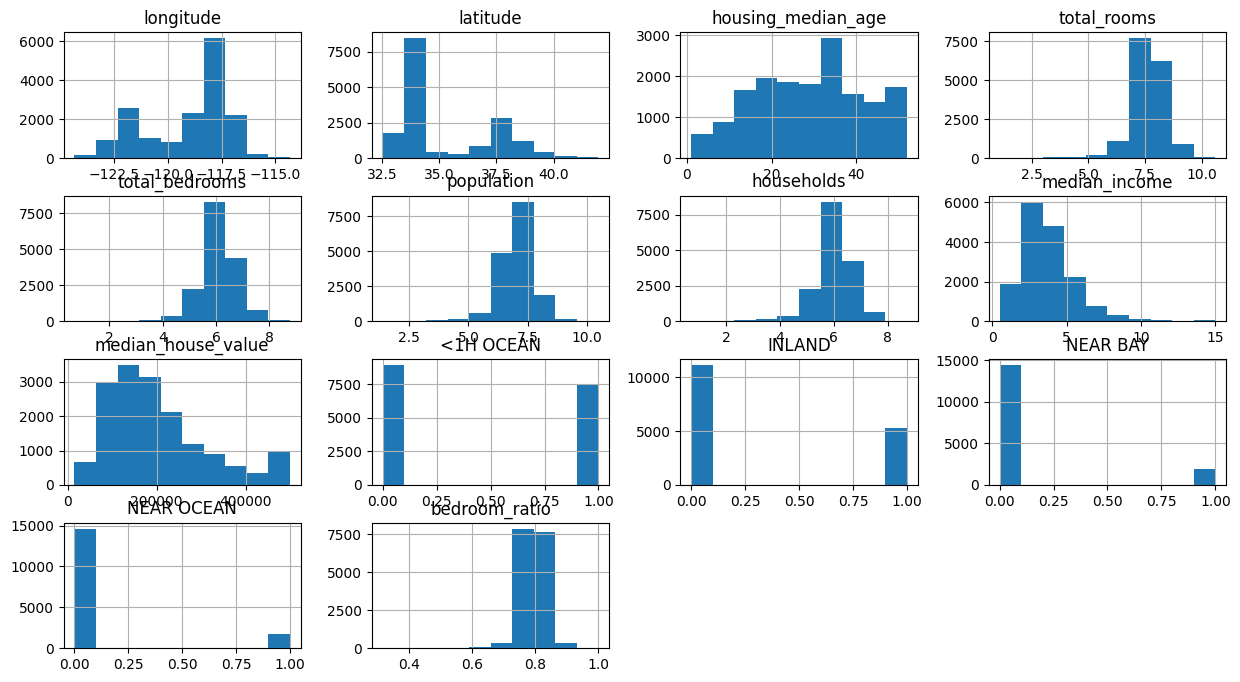

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,1,0,0.717813
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,1,0,0.790429
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,1,0,0.720313
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,1,0,0.764097
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,1,0,0.762444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16500,-121.04,37.78,32.0,7.978311,6.270988,7.290975,6.161207,2.5643,200000.0,0,1,0,0,0.786005
16501,-121.06,37.86,24.0,7.446585,5.796058,7.138073,5.783825,2.6830,169400.0,0,1,0,0,0.778351
16502,-121.13,37.74,31.0,6.519147,4.976734,6.261492,5.075174,2.4598,97100.0,0,1,0,0,0.763403
16503,-121.13,37.74,28.0,6.016157,4.653960,5.501258,4.595120,3.4643,90900.0,0,1,0,0,0.773577


In [ ]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)
train_data

ValueError: columns overlap but no suffix specified: Index(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')

In [ ]:
train_data=train_data.drop(['ISLAND'], axis=1)
train_data=train_data.drop(['ocean_proximity'], axis=1)

In [ ]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']

In [ ]:
#train_data=train_data.drop['NEAR BAY']
#train_data=train_data.drop['INLAND']
#train_data=train_data.drop['NEAR OCEAN']
#train_data=train_data.drop(['ISLAND'], axis=1)

<Axes: >

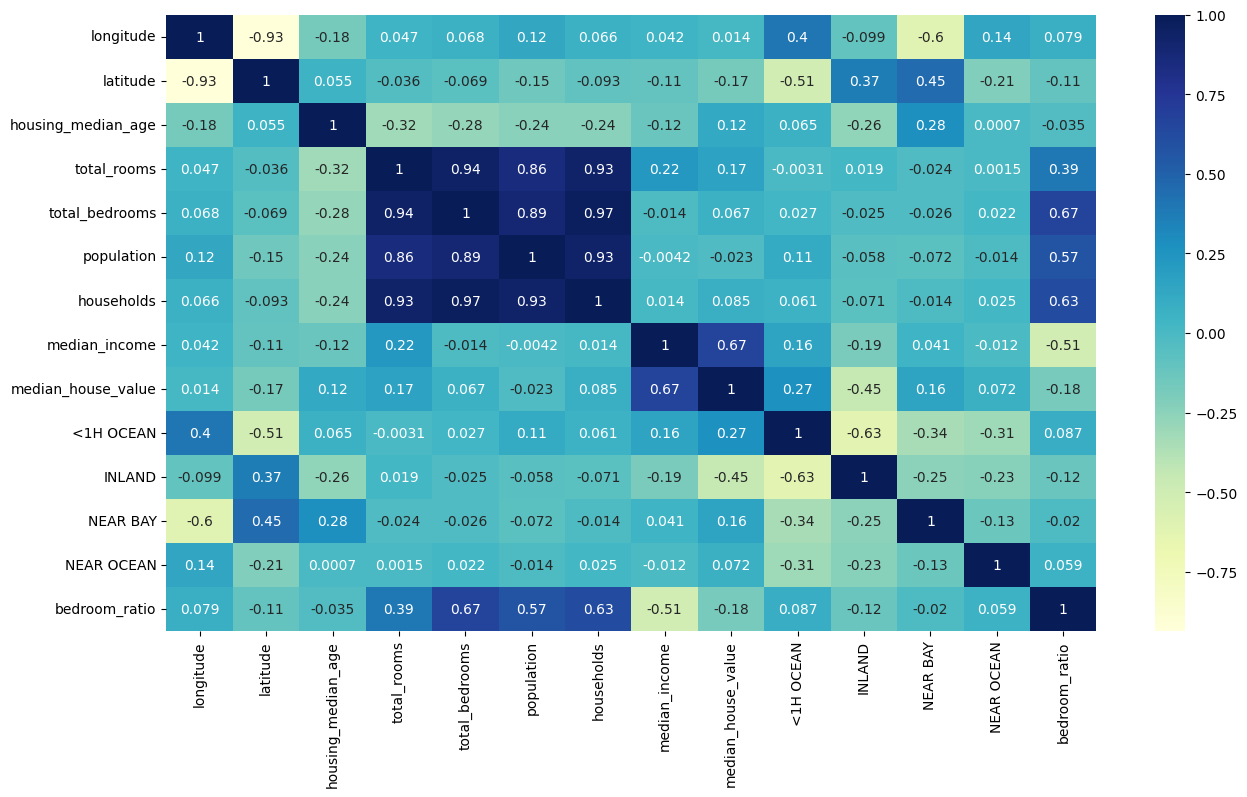

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [87]:
from sklearn.linear_model import LinearRegression
x_train, y_train=train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
reg=LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [ ]:
test_data=test_data.drop(['ocean_proximity'], axis=1)

In [ ]:
test_data=x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms'] + 1)
test_data['population']=np.log(test_data['population'] + 1)
test_data['households']=np.log(test_data['households'] + 1)

#test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,median_house_value
16505,-121.13,37.74,21.0,2.171747,1.969266,2.088138,1.958870,3.6016,0,1,0,0,0.906766,134600.0
16506,-121.13,37.73,40.0,2.082850,1.856011,2.015475,1.866222,3.3158,0,1,0,0,0.891092,125900.0
16507,-121.11,37.74,11.0,2.226286,2.001065,2.126027,1.984152,4.4213,0,1,0,0,0.898835,182700.0
16508,-121.10,37.80,35.0,2.143015,1.917677,2.062536,1.921600,3.3578,0,1,0,0,0.894850,149000.0
16509,-121.11,37.76,22.0,2.182219,1.948909,2.095966,1.943973,4.1833,0,1,0,0,0.893086,192100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,2.130394,1.935416,2.046469,1.917234,1.5603,0,1,0,0,0.908478,78100.0
20636,-121.21,39.49,18.0,2.021312,1.794635,1.928289,1.748318,2.5568,0,1,0,0,0.887857,77100.0
20637,-121.22,39.43,17.0,2.165723,1.972164,2.068851,1.956291,1.7000,0,1,0,0,0.910626,92300.0
20638,-121.32,39.43,18.0,2.143457,1.948216,2.029378,1.925406,1.8672,0,1,0,0,0.908913,84700.0


In [ ]:
x_test, y_test=test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
reg.score(x_test, y_test)

0.22816450084365802

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_test_s=scaler.fit_transform(x_test)
x_train_s=scaler.fit_transform(x_train)

In [76]:
reg.score(x_test_s, y_test)

0.635898294831706

In [69]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [77]:
forest.score(x_test_s, y_test)

0.5461270412011122

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators" : [100, 200, 300],
    "min_samples_split" : [2, 4],
    "max_depth" : [None, 4, 8]
}

grid_search=GridSearchCV(forest, param_grid, cv=5,
                         scoring="neg_mean_squared_error",
                         return_train_score=True)
grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [82]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=4, min_samples_split=4)

In [88]:
grid_search.best_estimator_.score(x_test_s, y_test)

0.6456290090350314